In [ ]:
%run ../../data/api_keys.ipynb
%run ../modulos.ipynb

In [ ]:
repos = pd.read_csv('../../data/repos_muestreos.csv')

In [ ]:
maxs=repos.loc[:,'stargazers':].max(0)
mins=repos.loc[:,'stargazers':].min(0)
df_est=(repos.loc[:,'stargazers':]-mins)/(maxs-mins)
df_est

,stargazers,watchers,forks,tamaño_kb,issues,network_size
0,0.0,0.444444,0.093023,0.008738,0.000000,0.093023
1,0.0,0.111111,0.046512,0.002274,0.000000,0.046512
2,0.0,0.111111,0.093023,0.000000,0.000000,0.093023
3,0.0,0.333333,0.000000,0.004000,0.000000,0.000000
4,0.0,0.333333,0.000000,0.001718,0.071429,0.000000
...,...,...,...,...,...,...
95,0.0,0.333333,0.000000,0.001718,0.071429,0.000000
96,0.0,0.222222,0.046512,0.000058,0.000000,0.046512
97,0.0,0.666667,0.139535,0.028189,1.000000,0.139535
98,0.0,0.111111,0.139535,0.000080,0.071429,0.139535


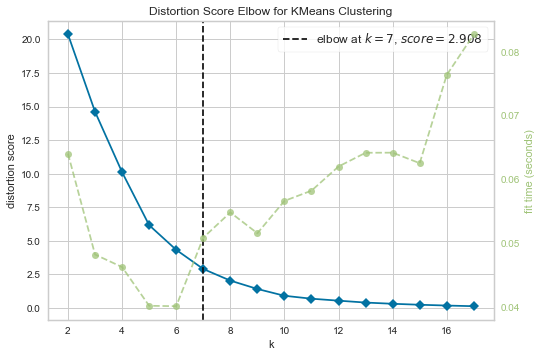

<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [ ]:
X_train=df_est.loc[:,:'issues']
from pandas.core.common import random_state
from yellowbrick.cluster import KElbowVisualizer
from sklearn.cluster import KMeans

model = KMeans()
visualizer = KElbowVisualizer(model, k=(2,18))

X_train=df_est.iloc[:100,:]
visualizer.fit(X_train)     
visualizer.show()

In [ ]:
from sklearn.cluster import KMeans
kmeans=KMeans(3)
c=kmeans.fit_predict(df_est.loc[:,:'issues'])
fig=px.scatter_matrix(df_est.loc[:,:'issues'],color=c)
fig.show()

Pensar otros atributos que regresen cosas menos obvias
Pensar en atributos de la segunda parte y ver como sacarlos en github
- fuerza de seguidores (owner del repo ir a los seguidores de cada uno de ellos sacar numero de repositorios o el numero promedio de estrellas y así, estrellas de repo más exitoso)
- seguidores de seguidores
- fuerza de los que te siguen
- historia de repositorios que ya tenemos  (estrellas, forks y lo que de el api)
- 